In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [2]:
data_dir= r'C:\Users\Benyamin\Downloads\DATASET\four-shapes\shapes' 

In [3]:
cat=['circle','square','star','triangle']

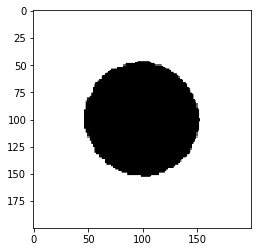

In [4]:
for category in cat: 
    path=os.path.join(data_dir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array) 
        break
    break 
    

In [5]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [6]:
img_array.shape

(200, 200)

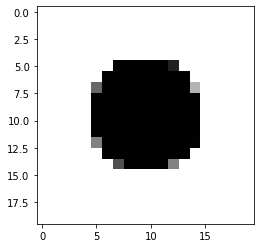

In [7]:
new_array=cv2.resize(img_array,(20,20))
plt.imshow(new_array)



In [9]:
train=[] 
def create_training_data():
    for category in cat: 
        path=os.path.join(data_dir,category) 
        class_cat=cat.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
                new_array=cv2.resize(img_array,(20,20)) 
                train.append([new_array, class_cat])
            except Exception as e:
                pass
create_training_data() 

In [10]:
print(len(train))

14970


In [11]:
x=[]
y=[]

for features, label in train: 
    x.append(features)
    y.append(label)
    




In [12]:
x[0] 

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,  33,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 103,   0,   0,   0,   0,   0,   0,   0,
          0, 179, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,  

In [13]:
x=np.array(x).reshape(-1,20,20,1) 


In [14]:
x=x/255


In [15]:
x[0] 

array([[[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
      

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

#Sequence encoder
encoder = Sequential() 
encoder.add(Flatten(input_shape=[20,20,1])) 
encoder.add(Dense(200,activation="relu")) 
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

#Sequence decoder
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu')) 
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(20 * 20, activation="sigmoid")) 
decoder.add(Reshape([20, 20])) 

autoencoder = Sequential([encoder, decoder]) 
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy']) 

In [18]:
autoencoder.fit(x_train, x_train, epochs=10,validation_data=[x_test, x_test])

Train on 11976 samples, validate on 2994 samples
Epoch 1/10
11976/11976 [==============================] - 3s 234us/sample - loss: 0.1659 - accuracy: 0.9146 - val_loss: 0.1091 - val_accuracy: 0.9386
Epoch 2/10
11976/11976 [==============================] - 2s 137us/sample - loss: 0.1049 - accuracy: 0.9414 - val_loss: 0.0960 - val_accuracy: 0.9445
Epoch 3/10
11976/11976 [==============================] - 2s 143us/sample - loss: 0.0931 - accuracy: 0.9469 - val_loss: 0.0921 - val_accuracy: 0.9477
Epoch 4/10
11976/11976 [==============================] - 2s 139us/sample - loss: 0.0808 - accuracy: 0.9525 - val_loss: 0.0694 - val_accuracy: 0.9570
Epoch 5/10
11976/11976 [==============================] - 2s 143us/sample - loss: 0.0661 - accuracy: 0.9596 - val_loss: 0.0563 - val_accuracy: 0.9639
Epoch 6/10
11976/11976 [==============================] - 2s 137us/sample - loss: 0.0540 - accuracy: 0.9652 - val_loss: 0.0707 - val_accuracy: 0.9572
Epoch 7/10
11976/11976 [===========================

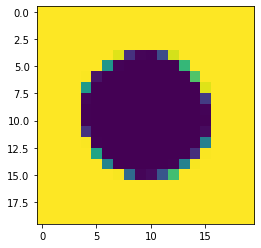

In [19]:
passed_images = autoencoder.predict(x_test[:10]) 
plt.imshow(passed_images[0]) 





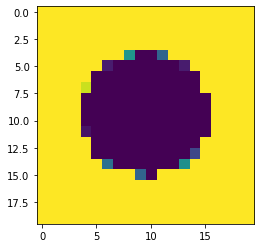

In [20]:
plt.imshow(x_test[0].reshape(20,20)) 

In [21]:
# AutoEncoders for Denoising Images


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



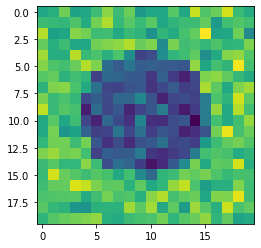

In [22]:
#Example to make the noises in the images
from tensorflow.keras.layers import GaussianNoise
sample = GaussianNoise(0.2) 
noisey = sample(x_test[0].reshape(20,20),training=True) 
plt.imshow(noisey) 


In [23]:
import tensorflow as tf
import numpy as np

#Encoder sequence
encoder = Sequential()
encoder.add(Flatten(input_shape=[20,20,1]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))   
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

#Decoder sequence
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(20 * 20, activation="sigmoid"))
decoder.add(Reshape([20, 20]))

noise_remover = Sequential([encoder, decoder])
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])


In [24]:
noise_remover.fit(x_train, x_train, epochs=10, validation_data=[x_test, x_test])


Train on 11976 samples, validate on 2994 samples
Epoch 1/10
11976/11976 [==============================] - 3s 264us/sample - loss: 0.1162 - accuracy: 0.9357 - val_loss: 0.0741 - val_accuracy: 0.9565
Epoch 2/10
11976/11976 [==============================] - 2s 154us/sample - loss: 0.0569 - accuracy: 0.9639 - val_loss: 0.0397 - val_accuracy: 0.9712
Epoch 3/10
11976/11976 [==============================] - 2s 151us/sample - loss: 0.0409 - accuracy: 0.9704 - val_loss: 0.0348 - val_accuracy: 0.9729
Epoch 4/10
11976/11976 [==============================] - 2s 178us/sample - loss: 0.0370 - accuracy: 0.9718 - val_loss: 0.0333 - val_accuracy: 0.9734
Epoch 5/10
11976/11976 [==============================] - 3s 236us/sample - loss: 0.0356 - accuracy: 0.9723 - val_loss: 0.0322 - val_accuracy: 0.9737
Epoch 6/10
11976/11976 [==============================] - 3s 263us/sample - loss: 0.0344 - accuracy: 0.9727 - val_loss: 0.0315 - val_accuracy: 0.9740
Epoch 7/10
11976/11976 [===========================

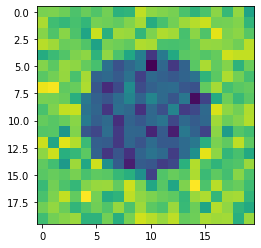

In [54]:
one_noisey_images = sample(x_test[0].reshape(-1,20,20),training=True)  #masukin 1 gambar ke model example awal tadi, buat liat gambar yg udah di noise, krn kita gabisa liat hasil noise di model noise_remover karena filter noise udah jadi satu dengan modelnya. Jadi harus terpisah buat ngeliat hasil input yg di noise

plt.imshow(one_noisey_images[0])  #liat gambar setelah di noise




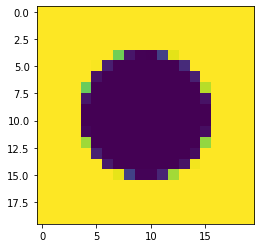

In [61]:
denoised = noise_remover(x_test[:10]) 
plt.imshow(denoised[0])      


